Campaign for selling personal loans


This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of customers
who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this
base rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers to
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the
retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.


The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.


The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer&#39;s relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among
these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

DataSet-Bank_Personal_Loan_Modelling.csv

Column Descrition - TheraBank_Column_Description.xlsx

1. Read the column description and ensure you understand each attribute well


2. Study the data distribution in each attribute, share your findings. 


3. Get the target column distribution. 


4. Split the data into training and test set in the ratio of 70:30 respectively


5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans 


6. Print the confusion matrix for all the above models 


7. Give your reasoning on which is the best model in this case and why it performs better? 

In [142]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt    

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

#Model selection Library
from sklearn import model_selection


# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

from pandas.plotting import scatter_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

#Naive Bayes Library 
from sklearn.naive_bayes import GaussianNB

#mlxtend Library for feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = pd.read_excel("C:\AIML\Project\Project 2\TheraBank_Column_Description.xlsx")

In [3]:
columns

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,Data Description:,NaN
5,NaN,NaN,NaN
6,NaN,ID,Customer ID
7,NaN,Age,Customer's age in completed years
8,NaN,Experience,#years of professional experience
9,NaN,Income,Annual income of the customer ($000)


## Removing the rows and columns containing NAN values

In [4]:
columns.drop('Unnamed: 0',axis=1,inplace=True)
columns

,Unnamed: 1,Unnamed: 2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,Data Description:,NaN
5,NaN,NaN
6,ID,Customer ID
7,Age,Customer's age in completed years
8,Experience,#years of professional experience
9,Income,Annual income of the customer ($000)


In [5]:
columns.drop([0,1,2,3,4,5,],inplace=True)

In [6]:
columns

,Unnamed: 1,Unnamed: 2
6,ID,Customer ID
7,Age,Customer's age in completed years
8,Experience,#years of professional experience
9,Income,Annual income of the customer ($000)
10,ZIPCode,Home Address ZIP code.
11,Family,Family size of the customer
12,CCAvg,Avg. spending on credit cards per month ($000)
13,Education,Education Level. 1: Undergrad; 2: Graduate; 3:...
14,Mortgage,Value of house mortgage if any. ($000)
15,Personal Loan,Did this customer accept the personal loan off...


## Changing the column names

In [7]:
columns.rename(columns={"Unnamed: 1": "columns", "Unnamed: 2" : "Description"},inplace = True)

In [8]:
columns.head()

,columns,Description
6,ID,Customer ID
7,Age,Customer's age in completed years
8,Experience,#years of professional experience
9,Income,Annual income of the customer ($000)
10,ZIPCode,Home Address ZIP code.


## Reading the csv data file

In [111]:
data = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [112]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [113]:
data.shape

(5000, 14)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [115]:
#Checking values stored in the dataframe
for column in data.columns:
    print("FEATURE NAME & VALUES = %s - %s"%(column, data[column].unique()[:10]))

FEATURE NAME & VALUES = ID - [ 1  2  3  4  5  6  7  8  9 10]
FEATURE NAME & VALUES = Age - [25 45 39 35 37 53 50 34 65 29]
FEATURE NAME & VALUES = Experience - [ 1 19 15  9  8 13 27 24 10 39]
FEATURE NAME & VALUES = Income - [ 49  34  11 100  45  29  72  22  81 180]
FEATURE NAME & VALUES = ZIP Code - [91107 90089 94720 94112 91330 92121 91711 93943 93023 94710]
FEATURE NAME & VALUES = Family - [4 3 1 2]
FEATURE NAME & VALUES = CCAvg - [1.6 1.5 1.  2.7 0.4 0.3 0.6 8.9 2.4 0.1]
FEATURE NAME & VALUES = Education - [1 2 3]
FEATURE NAME & VALUES = Mortgage - [  0 155 104 134 111 260 163 159  97 122]
FEATURE NAME & VALUES = Personal Loan - [0 1]
FEATURE NAME & VALUES = Securities Account - [1 0]
FEATURE NAME & VALUES = CD Account - [0 1]
FEATURE NAME & VALUES = Online - [0 1]
FEATURE NAME & VALUES = CreditCard - [0 1]


In [116]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [117]:
Experience = data[data['Experience']<0]
Experience['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

In [118]:
Experience25=data[(data['Age']==25) & (data['Experience']>0)]
Median25 = Experience25['Experience'].median()
print('Median of the experience of the peoples having age 25 :',Median25)

Experience24=data[(data['Age']==24) & (data['Experience']>0)]
Median24 = Experience24['Experience'].median()
print('Median of the experience of the peoples having age 24 :',Median24)

Experience23=data[(data['Age']==23) & (data['Experience']>0)]
Median23 = Experience23['Experience'].median()
print('Median of the experience of the peoples having age 23 :',Median23)

Experience29=data[(data['Age']==29) & (data['Experience']>0)]
Median29 = Experience29['Experience'].median()
print('Median of the experience of the peoples having age 29 :',Median29)

Experience28=data[(data['Age']==28) & (data['Experience']>0)]
Median28 = Experience28['Experience'].median()
print('Median of the experience of the peoples having age 28 :',Median28)

Experience26=data[(data['Age']==26) & (data['Experience']>0)]
Median26 = Experience26['Experience'].median()
print('Median of the experience of the peoples having age 26 :',Median26)

Median of the experience of the peoples having age 25 : 1.0
Median of the experience of the peoples having age 24 : nan
Median of the experience of the peoples having age 23 : nan
Median of the experience of the peoples having age 29 : 4.0
Median of the experience of the peoples having age 28 : 3.0
Median of the experience of the peoples having age 26 : 2.0


In [119]:
data.loc[data.loc[np.where((data['Age']==25) & (data['Experience']<0))].index, 'Experience'] = Median25
data.loc[data.loc[np.where((data['Age']==24) & (data['Experience']<0))].index, 'Experience'] = 0
data.loc[data.loc[np.where((data['Age']==23) & (data['Experience']<0))].index, 'Experience'] = 0
data.loc[data.loc[np.where((data['Age']==29) & (data['Experience']<0))].index, 'Experience'] = Median29
data.loc[data.loc[np.where((data['Age']==28) & (data['Experience']<0))].index, 'Experience'] = Median28
data.loc[data.loc[np.where((data['Age']==26) & (data['Experience']<0))].index, 'Experience'] = Median26


In [120]:
for column in data.columns:
    print("FEATURE NAME & VALUES = %s - %s"%(column, data[column].unique()[:10]))

FEATURE NAME & VALUES = ID - [ 1  2  3  4  5  6  7  8  9 10]
FEATURE NAME & VALUES = Age - [25 45 39 35 37 53 50 34 65 29]
FEATURE NAME & VALUES = Experience - [ 1. 19. 15.  9.  8. 13. 27. 24. 10. 39.]
FEATURE NAME & VALUES = Income - [ 49  34  11 100  45  29  72  22  81 180]
FEATURE NAME & VALUES = ZIP Code - [91107 90089 94720 94112 91330 92121 91711 93943 93023 94710]
FEATURE NAME & VALUES = Family - [4 3 1 2]
FEATURE NAME & VALUES = CCAvg - [1.6 1.5 1.  2.7 0.4 0.3 0.6 8.9 2.4 0.1]
FEATURE NAME & VALUES = Education - [1 2 3]
FEATURE NAME & VALUES = Mortgage - [  0 155 104 134 111 260 163 159  97 122]
FEATURE NAME & VALUES = Personal Loan - [0 1]
FEATURE NAME & VALUES = Securities Account - [1 0]
FEATURE NAME & VALUES = CD Account - [0 1]
FEATURE NAME & VALUES = Online - [0 1]
FEATURE NAME & VALUES = CreditCard - [0 1]


In [121]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.126600,11.428854,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


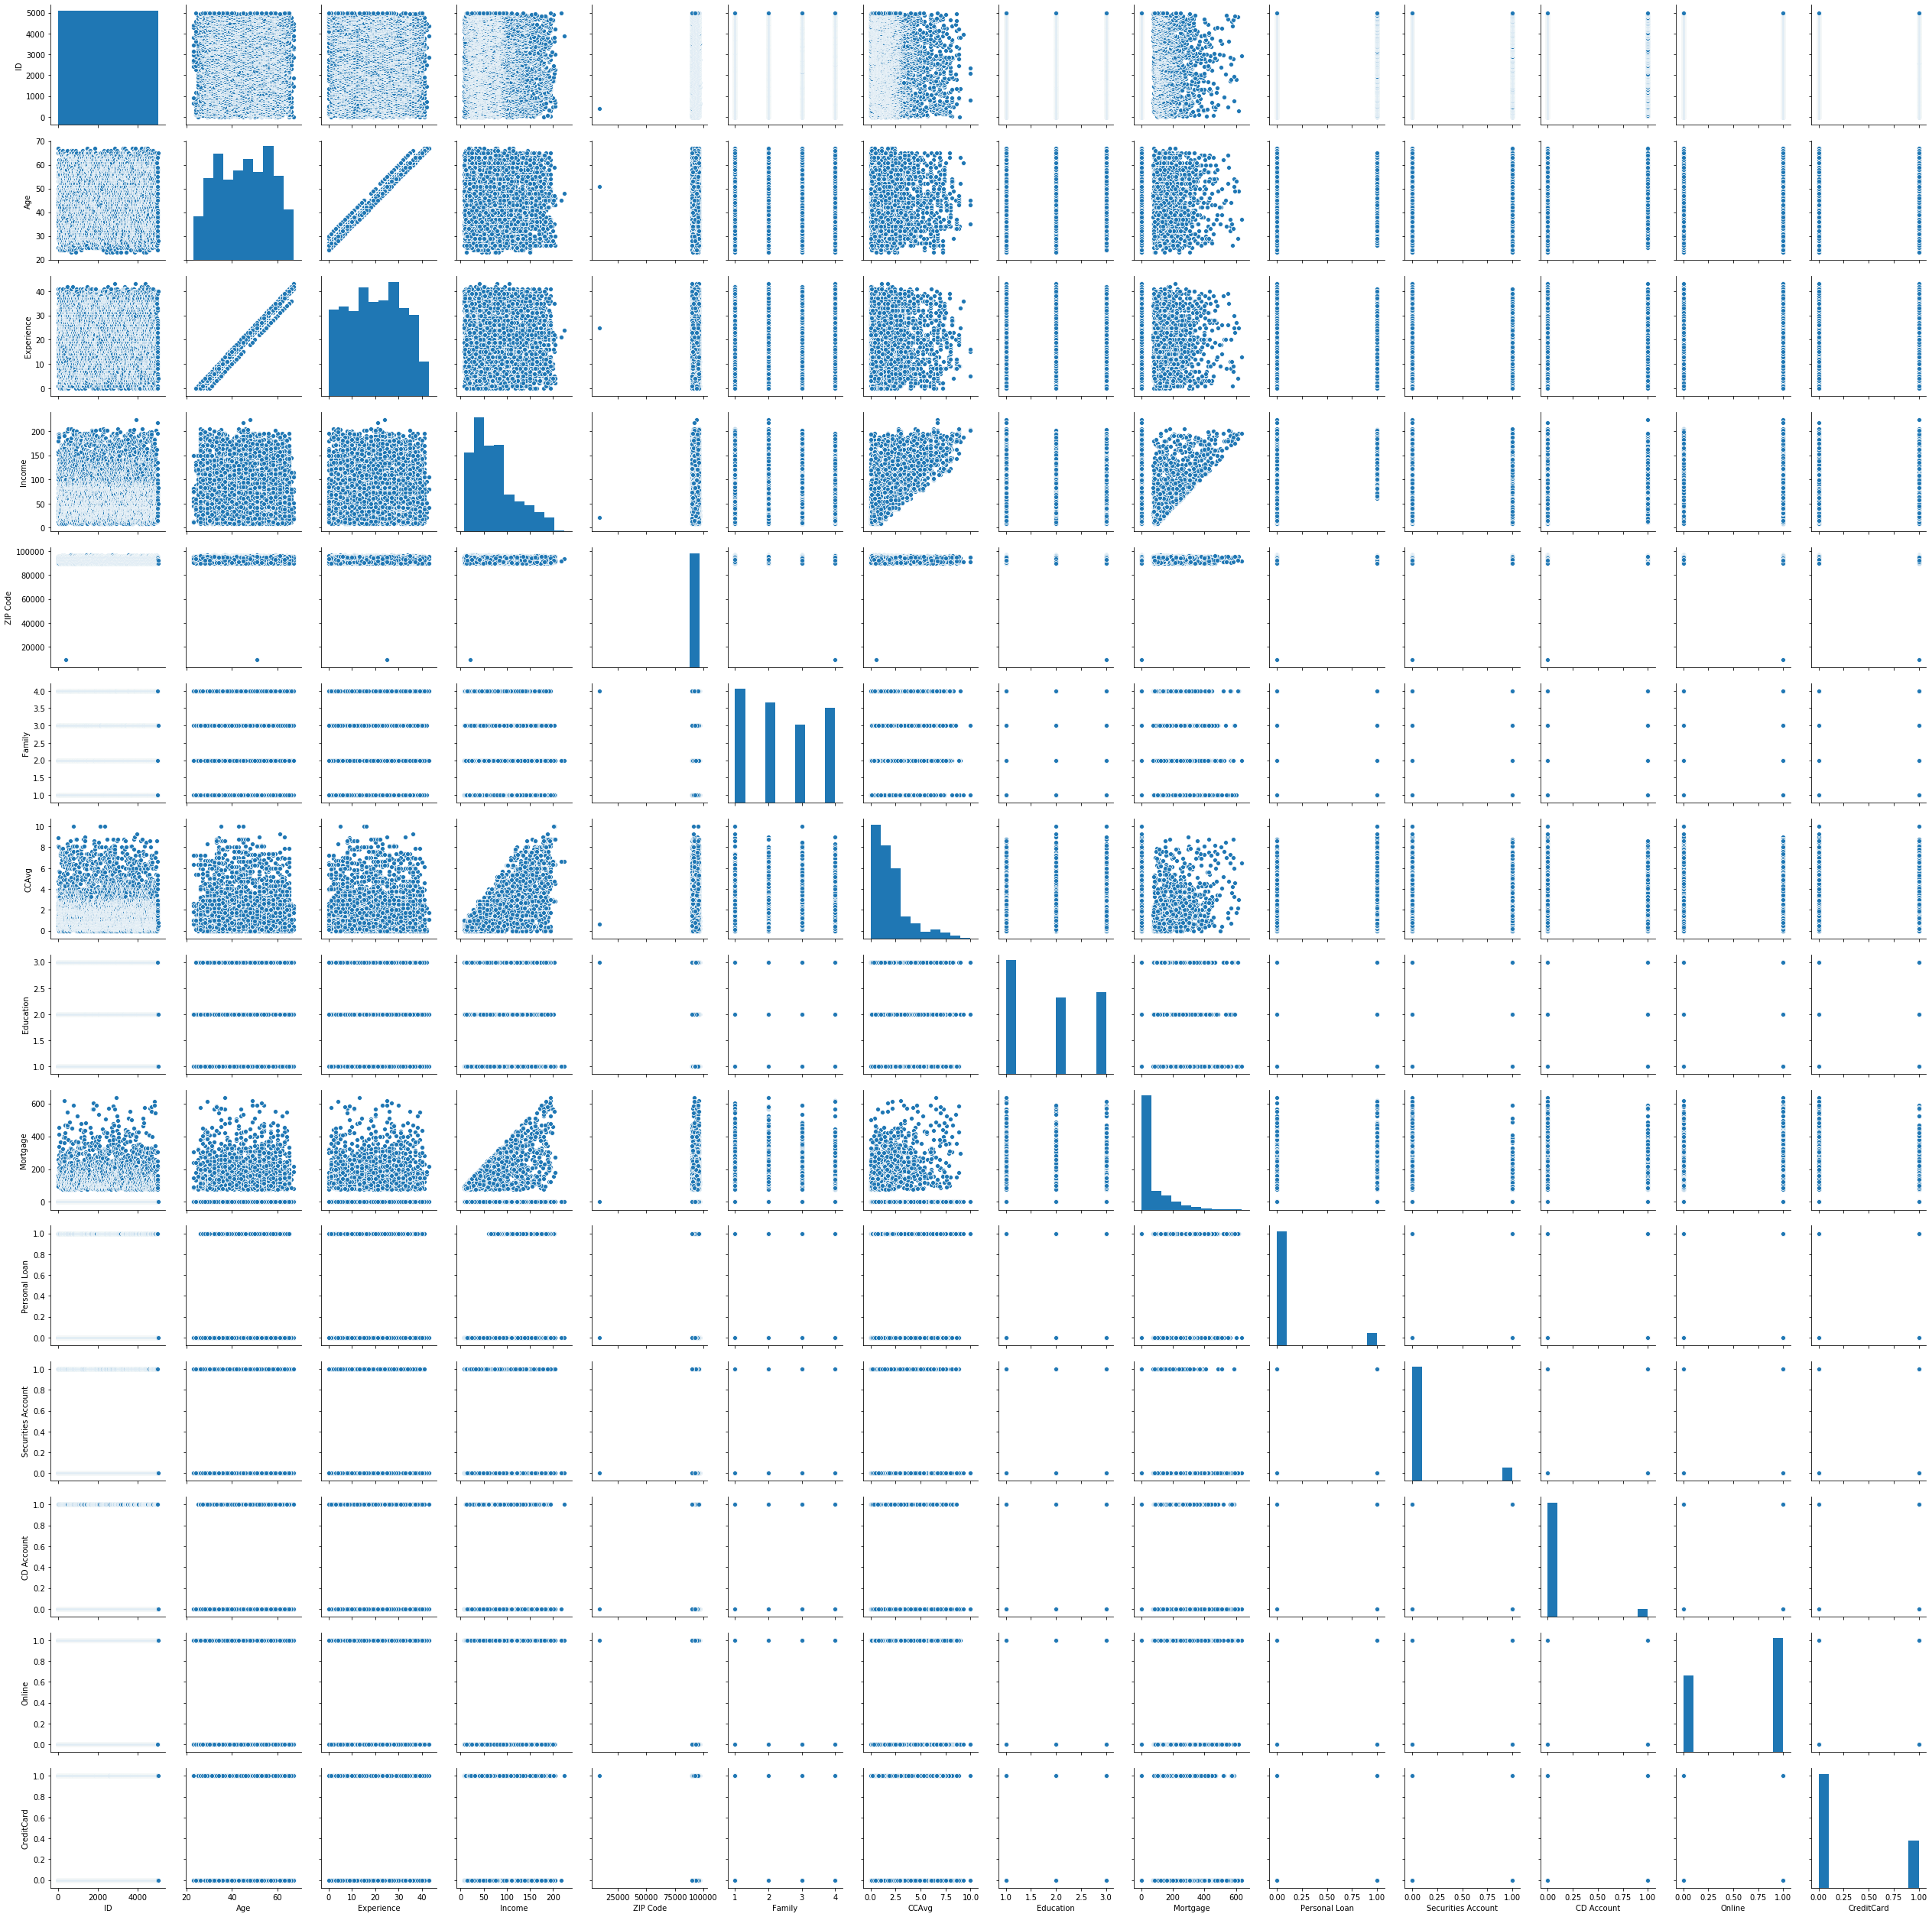

In [101]:
sns.pairplot(data)

In [122]:
print('Mean : ')
print(data.mean())
print('Median : ')
print(data.median())

Mean : 
ID                     2500.500000
Age                      45.338400
Experience               20.126600
Income                   73.774200
ZIP Code              93152.503000
Family                    2.396400
CCAvg                     1.937938
Education                 1.881000
Mortgage                 56.498800
Personal Loan             0.096000
Securities Account        0.104400
CD Account                0.060400
Online                    0.596800
CreditCard                0.294000
dtype: float64
Median : 
ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64


In [123]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008143,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994212,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008143,0.994212,1.000000,-0.046893,-0.028564,-0.052142,-0.050031,0.014074,-0.010960,-0.008066,-0.001264,0.009901,0.013744,0.009062
Income,-0.017695,-0.055269,-0.046893,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028564,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052142,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050031,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.014074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010960,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008066,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [124]:
#Look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
data.groupby(['Personal Loan']).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


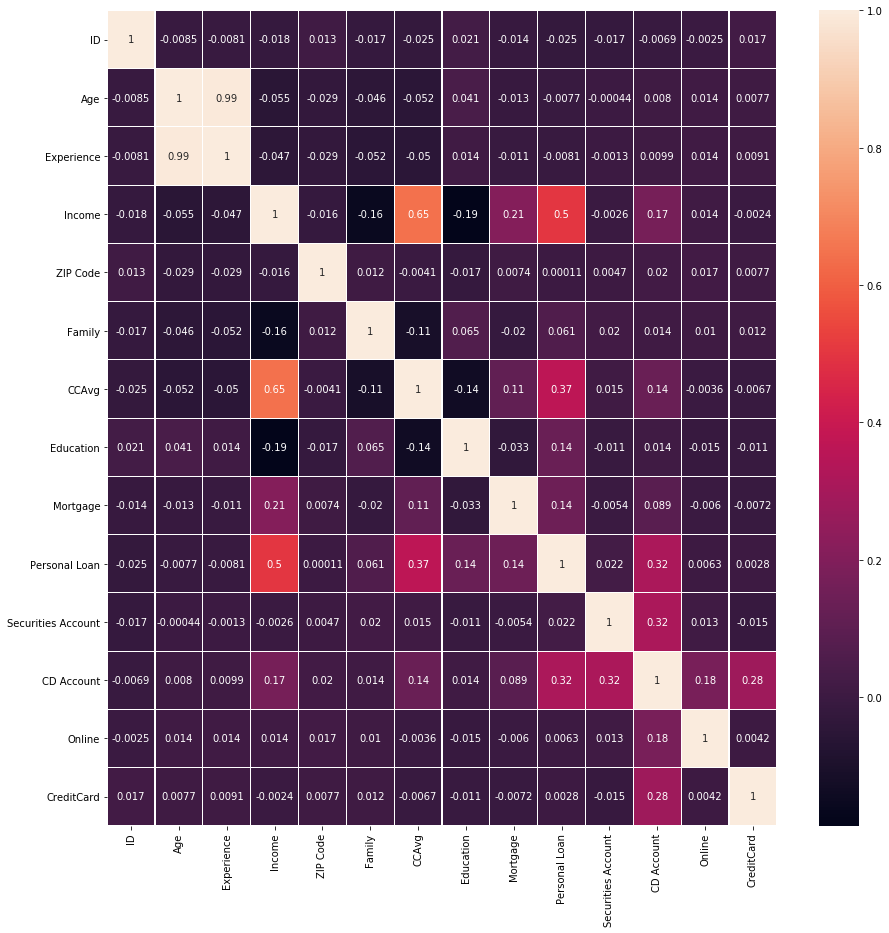

In [125]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(),annot=True,linewidth=.1)

### Observation

1. Age and Experience is highly correlated.
2. Income and CCAvg is moderately correlated.
3. Age feature is normally distributed as mean is almost equal to median.
4. Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. So We need to replace the negetive values with the median of the experience of the same age group.
5. Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.
6. CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.
7. Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.
8. The variables family and education are ordinal variables. The distribution of families is evenly distributes.

### Plotting the scatter graph between Age and experience to show high correlation between them

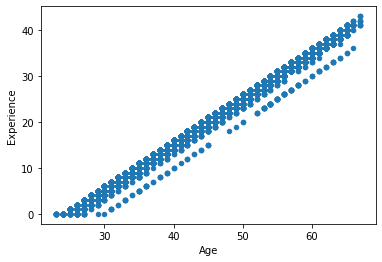

In [150]:
data.plot.scatter(x='Age', y='Experience')

### Plotting the scatter graph between Income and CCAvg to show moderate correlation between them

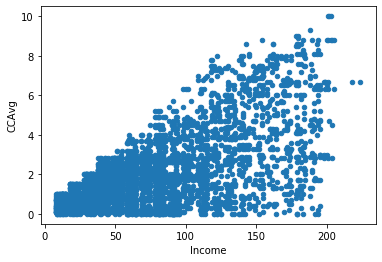

In [152]:
data.plot.scatter(x='Income', y='CCAvg')

## getting target column

In [126]:
target = data["Personal Loan"]

In [127]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

## Spiliting the data in 70:30 ratio

In [128]:
feature_set=data.drop('Personal Loan',axis=1)
target_set=data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(feature_set, target_set, test_size=0.30,random_state=1)

# Find the optimal number of neighbours (KNN)

In [131]:
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
neighbors = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k

for i, k in enumerate(neighbors):
  
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    #Compute accuracy on the training set
    train_accuracy_plot[i] = knn.score(scaledX_train,y_train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = knn.score(scaledX_test,y_test)
    print("For K=%d, Test Accuracy=%f, & Train Accuracy=%f"%(k,test_accuracy_plot[i],train_accuracy_plot[i]))


For K=1, Test Accuracy=0.944000, & Train Accuracy=1.000000
For K=2, Test Accuracy=0.937333, & Train Accuracy=0.964857
For K=3, Test Accuracy=0.944667, & Train Accuracy=0.976000
For K=4, Test Accuracy=0.940000, & Train Accuracy=0.962571
For K=5, Test Accuracy=0.943333, & Train Accuracy=0.968857
For K=6, Test Accuracy=0.937333, & Train Accuracy=0.959429
For K=7, Test Accuracy=0.943333, & Train Accuracy=0.962000
For K=8, Test Accuracy=0.940000, & Train Accuracy=0.955714
For K=9, Test Accuracy=0.942000, & Train Accuracy=0.959429
For K=10, Test Accuracy=0.939333, & Train Accuracy=0.954286
For K=11, Test Accuracy=0.942000, & Train Accuracy=0.956571
For K=12, Test Accuracy=0.937333, & Train Accuracy=0.952571


In [132]:
predict = knn.predict(scaledX_test)

### Confusion Matrix

In [133]:
print(metrics.confusion_matrix(y_test, predict))

[[1350    1]
 [  93   56]]


### The result is telling us that we have 1350 + 56 = 1406 correct predictions and 93 + 1 = 94 incorrect predictions!

### Plot accuracy score vs k (with k value on X-axis) using matplotlib.

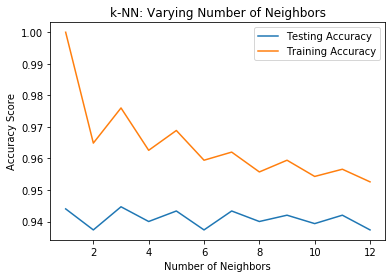

In [134]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.show()

## For the K=3, The traiing accuracy is around 97% and testing accuracy is aroung 95%. So for the value 3, we have the best model.

# Logistic Regression

In [135]:
#Invoking the logistics regression classifier function.
dt_model = LogisticRegression(random_state=1)
dt_model.fit(X_train, y_train)
print("Training Score: ", dt_model.score(X_train , y_train))

Training Score:  0.9091428571428571


In [136]:
y_predict = dt_model.predict(X_test)
print("Testing Score: ", dt_model.score(X_test , y_test))

Testing Score:  0.908


In [154]:
#Build step forward feature selection
sfs1 = sfs(gnb_model, k_features=12, forward=True, scoring='r2', cv=10)

In [158]:
#Perform SFFS
sfs1 = sfs1.fit(scaledX_train, y_train)

sfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([-0.10725552, -0.10410095, -0.10410095, -0.10410095, -0.10410095,
         -0.10410095, -0.10410095, -0.10410095, -0.10410095, -0.10443038]),
  'avg_score': -0.10444934712294847,
  'feature_names': ('0',),
  'ci_bound': 0.0006985464436877177,
  'std_dev': 0.000940533544045095,
  'std_err': 0.000313511181348365},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([-0.10725552, -0.10410095, -0.10410095, -0.10410095, -0.10410095,
         -0.10410095, -0.10410095, -0.10410095, -0.10410095, -0.10443038]),
  'avg_score': -0.10444934712294847,
  'feature_names': ('0', '1'),
  'ci_bound': 0.0006985464436877177,
  'std_dev': 0.000940533544045095,
  'std_err': 0.000313511181348365},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([-0.10725552, -0.10410095, -0.10410095, -0.10410095, -0.10410095,
         -0.10410095, -0.10410095, -0.10410095, -0.10410095, -0.10443038]),
  'avg_score': -0.10444934712294847,
  'feature_names': ('0', '1', '2'),
  'ci

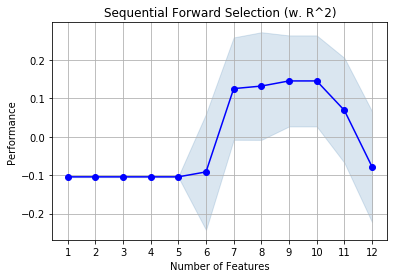

In [159]:
fig = plot_sfs(sfs1.get_metric_dict())
plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [160]:
#Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12]


#### Confusion matrix

In [137]:
print(metrics.confusion_matrix(y_test, y_predict))

[[1319   32]
 [ 106   43]]


### The result is telling us that we have 1319 + 43 = 1362 correct predictions and 106 + 32 = 138 incorrect predictions!

In [138]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

    accuracy                           0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



# NaiveBayes Model

In [139]:
#Invoking the GaussianNB classifier function.
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print("Training Score: ", gnb_model.score(X_train , y_train))

#Invoking the GaussianNB classifier function.
Y_predict1 = gnb_model.predict(X_test)
print("Testing Score: ", gnb_model.score(X_test , y_test))

Training Score:  0.8948571428571429
Testing Score:  0.8826666666666667


### Confusion Matrix

In [140]:
print(metrics.confusion_matrix(y_test, Y_predict1))

[[1239  112]
 [  64   85]]


### The result is telling us that we have 1239 + 85 = 1324 correct predictions and 64 + 112 = 174 incorrect predictions!

# Comparison between the models

NB: 0.887000 (0.010440)
LR: 0.907200 (0.007600)
KNN: 0.900000 (0.015388)


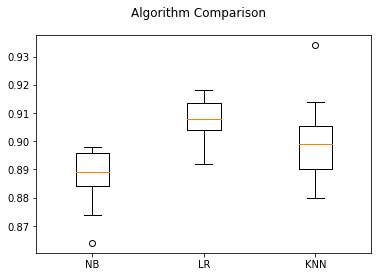

In [145]:
df_result = pd.DataFrame(columns = ['Model', 'Accuracy', 'Scaled Accuracy'])
X=np.array(feature_set)
Y=np.array(target_set)
models = []
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, feature_set, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    df_result = df_result.append({'Model': name, 'Accuracy': cv_results.mean()}, ignore_index=True) 
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Observations and Conclusions

1. KNN Model: For the K=3, The traiing accuracy is around 97% and testing accuracy is aroung 95%. So for the value 3, we have the best model.
2. Naive Model : The traiing accuracy is around 89% and testing accuracy is aroung 88%. 
3. Logistic Regression : The traiing accuracy is around 90% and testing accuracy is aroung 90%. 
4. So By using KNN , we can made the best model to predict the Persoanl loan amount.Hence, In the current set of algorithms applied on the available data, it seems to be the best choice to predict the customers who will accept the personal loan.